In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#pd.set_option('max_columns', 30)
pd.options.display.max_columns = 30

In [2]:
df = pd.read_csv('HCV-Egy-Data.csv')

In [3]:
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,7044,4957174.0,15,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,6207,4636951.0,10,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,4913,4122038.0,14,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,7257,4241990.0,10,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,15,3


### Data Understanding

Hepatitis C being as a prevalent disease in the world especially in countries like Egypt. It is estimated that 3-4 million new cases every year, indicating as a public health problem and should be addressed with identification and treatment policies. The publicly available UCI machine learning repository is used to retrieve the Hepatitis C Virus (HCV) for Egyptian patients Dataset available at [14]. The multivariate datatype consists of 1385 instances with 29 attributes. The multiclass label (i.e., Baseline histological staging) dataset instances consist of distinct values and frequencies, which are as follows F1 (portal fibrosis without septa, 336), F2 (few septa, 332), F3 (many septa without cirrhosis, 355) and F4 (cirrhosis, 362). The binary class label dataset consists of mild to moderate fibrosis as class label = 0 (F1 and F2) and advanced fibrosis as class label =1 (F3-F4) according to METAVIR score [9], resulting with a balanced dataset (Table 1). Previous studies show that the performance on a balanced dataset is better, this study's purpose is to take note of whether a similar classification performance can be observed between multi and binary class labels of the same dataset.


Age (int): Age in years

Gender (int): 1 for male, 2 for female

BMI (int): Body Mass Index

Fever (binary): Presence or absence of fever

Nausea/Vomiting (binary): Presence or absence of nausea/vomiting

Headache (binary): Presence or absence of headache

Diarrhea (binary): Presence or absence of diarrhea

Fatigue & generalized bone ache (binary): Presence or absence of fatigue and generalized bone ache

Jaundice (binary): Presence or absence of jaundice

Epigastric pain (binary): Presence or absence of epigastric pain

WBC (int): White blood cell count. A normal WBC count for adults ranges from around 4,500 to 11,000 white blood cells per microliter of blood.

RBC (float): Red blood cell count. In adults, the typical range for RBC count is approximately 4.5 to 5.5 million cells per microliter of blood for males and 4.0 to 5.0 million cells per microliter for females.

HGB (int): Hemoglobin level. In adults, the typical range for hemoglobin levels is around 12 to 15 g/dL for women and 13.5 to 17.5 g/dL for men.

Plat (float): Platelet count. In general, a normal platelet count ranges from around 150,000 to 450,000 platelets per µL of blood.

AST 1 (int): Aspartate transaminase ratio. AST and ALT are enzymes found primarily in the liver.

ALT 1 (int): Alanine transaminase ratio at 1 week. ALT levels are commonly used as a marker of liver health and function

ALT 4 (float): Alanine transaminase ratio at 4 weeks

ALT 12 (int): Alanine transaminase ratio at 12 weeks

ALT 24 (int): Alanine transaminase ratio at 24 weeks

ALT 36 (int): Alanine transaminase ratio at 36 weeks

ALT 48 (int): Alanine transaminase ratio at 48 weeks

ALT after 24 w (int): Alanine transaminase ratio after 24 weeks

RNA Base (int): RNA Base value.. RNA Base represents the initial or starting level of RNA

RNA 4 (int): RNA value at 4 weeks

RNA 12 (int): RNA value at 12 weeks

RNA EOT (int): RNA value at end-of-treatment. 

RNA EF (int): RNA Elongation Factor value

Baseline histological Grading (int): Baseline histological grading.. scoring of the histological characteristics of a biological sample taken at the baseline or initial stage of a study or observation

Baseline histological staging (int): Baseline histological staging...  it represents the staging system used to classify the histological samples based on the severity, extent, or progression of the disease being studied

### DATA CLEANING

In [4]:
# Rename multiple columns
df = df.rename(columns={'Age ': 'Age', 'Nausea/Vomting': 'Nausea/Vomiting', 'Headache ': 'Headache', 'Diarrhea ': 'Diarrhea', 'Fatigue & generalized bone ache ': 'Fatigue & generalized bone ache', 'Jaundice ': 'Jaundice', 'Epigastric pain ': 'Epigastric pain', 'Baselinehistological staging': 'Baseline histological staging'})

In [5]:
df['Gender'].replace({1: 'Male', 2: 'Female'}, inplace=True)
df['Fever'].replace({1: 'Absent', 2: 'Present'}, inplace=True)
df["Nausea/Vomiting"].replace({1: 'Absent', 2: 'Present'}, inplace=True)
df['Headache'].replace({1: 'Absent', 2: 'Present'}, inplace=True)
df['Diarrhea'].replace({1: 'Absent', 2: 'Present'}, inplace=True)
df['Fatigue & generalized bone ache'].replace({1: 'Absent', 2: 'Present'}, inplace=True)
df['Jaundice'].replace({1: 'Absent', 2: 'Present'}, inplace=True)
df['Epigastric pain'].replace({1: 'Absent', 2: 'Present'}, inplace=True)

### EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

In [6]:
index = []

for i in range(len(df)):
    index.append('P' + str(i))
    
# Add the new list as the first column to the DataFrame
df.insert(0, 'Patient ID', index)

In [7]:
df.head()

,Patient ID,Age,Gender,BMI,Fever,Nausea/Vomiting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baseline histological staging
0,P0,56,Male,35,Present,Absent,Absent,Absent,Present,Present,Present,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,P1,46,Male,29,Absent,Present,Present,Absent,Present,Present,Absent,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,P2,57,Male,33,Present,Present,Present,Present,Absent,Absent,Absent,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,P3,49,Female,33,Absent,Present,Absent,Present,Absent,Present,Absent,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,P4,59,Male,32,Absent,Absent,Present,Absent,Present,Present,Present,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [8]:
df.tail()

,Patient ID,Age,Gender,BMI,Fever,Nausea/Vomiting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baseline histological staging
1380,P1380,44,Male,29,Absent,Present,Present,Present,Absent,Absent,Absent,7044,4957174.0,15,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,15,4
1381,P1381,55,Male,34,Absent,Present,Present,Absent,Absent,Absent,Absent,6207,4636951.0,10,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,10,2
1382,P1382,42,Male,26,Present,Present,Absent,Absent,Absent,Present,Absent,4913,4122038.0,14,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,6,2
1383,P1383,52,Male,29,Present,Absent,Absent,Present,Present,Present,Absent,7257,4241990.0,10,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,15,3
1384,P1384,55,Female,26,Absent,Present,Present,Present,Absent,Present,Absent,11832,4059176.0,14,136615.0,51,126,39.0,68,115,64,71,34,1190577,628730,5,5,5,13,3


In [9]:
#check for random datas using .sample()

df.sample(10)

,Patient ID,Age,Gender,BMI,Fever,Nausea/Vomiting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baseline histological staging
98,P98,36,Female,34,Present,Absent,Present,Absent,Present,Present,Absent,11688,4622950.0,13,103521.0,52,76,107.0,112,123,84,120,27,746998,385015,5,5,5,14,2
651,P651,49,Male,22,Present,Absent,Absent,Absent,Absent,Absent,Absent,3271,4757897.0,15,122794.0,76,42,78.0,78,115,125,111,42,812834,1058694,754039,581734,576122,16,1
213,P213,53,Female,24,Absent,Present,Absent,Absent,Absent,Absent,Present,7518,4492980.0,12,183155.0,98,51,89.0,92,42,104,101,22,891117,269696,5,5,5,10,4
381,P381,48,Male,24,Present,Present,Absent,Absent,Present,Present,Absent,9941,4897095.0,15,125236.0,67,53,76.0,125,74,48,70,39,52625,832107,5,5,5,12,4
1286,P1286,39,Female,31,Present,Present,Present,Present,Present,Present,Present,10136,4083496.0,14,114801.0,80,108,43.0,103,73,51,52,39,89313,458593,655263,664958,785560,11,4
616,P616,45,Male,27,Absent,Absent,Present,Present,Absent,Present,Present,4351,3912659.0,11,161907.0,76,77,47.0,121,85,125,50,26,56964,165090,273876,15512,532412,13,1
749,P749,54,Male,33,Present,Present,Absent,Absent,Absent,Absent,Absent,10620,4036992.0,12,191246.0,50,93,127.0,121,104,92,108,36,241976,41956,766070,236661,28243,11,4
507,P507,43,Male,26,Present,Present,Absent,Present,Absent,Absent,Absent,8485,4525070.0,14,170619.0,66,40,107.0,67,49,87,67,44,534845,1092363,414250,468115,568392,11,3
668,P668,38,Female,31,Absent,Present,Absent,Absent,Present,Present,Absent,8737,4468031.0,12,126179.0,55,127,45.0,60,42,92,114,28,608741,391204,392899,170888,707455,12,3
975,P975,56,Female,30,Absent,Present,Present,Absent,Present,Present,Present,8185,4857663.0,13,93034.0,68,60,98.0,64,124,55,119,27,73948,1168352,519804,208642,685730,3,1


In [10]:
#Columns present in the Dataset .columns

df.columns 

Index(['Patient ID', 'Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomiting',
       'Headache', 'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baseline histological staging'],
      dtype='object')

In [11]:
#Check for rows and columns in the dataset using .shape()

print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 1385 observation and 30 columns in the dataset


In [12]:
#Check for their Count and Datatype using .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       1385 non-null   object 
 1   Age                              1385 non-null   int64  
 2   Gender                           1385 non-null   object 
 3   BMI                              1385 non-null   int64  
 4   Fever                            1385 non-null   object 
 5   Nausea/Vomiting                  1385 non-null   object 
 6   Headache                         1385 non-null   object 
 7   Diarrhea                         1385 non-null   object 
 8   Fatigue & generalized bone ache  1385 non-null   object 
 9   Jaundice                         1385 non-null   object 
 10  Epigastric pain                  1385 non-null   object 
 11  WBC                              1385 non-null   int64  
 12  RBC                 

In [13]:
df2 = df.copy()

In [14]:
# Define the mapping dictionary
mapping = {1: 0, 2: 0, 3: 1, 4: 1}

# Apply the mapping using the 'map' function
df2['Baseline histological staging'] = df2['Baseline histological staging'].map(mapping)

In [15]:
df2

,Patient ID,Age,Gender,BMI,Fever,Nausea/Vomiting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baseline histological staging
0,P0,56,Male,35,Present,Absent,Absent,Absent,Present,Present,Present,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,0
1,P1,46,Male,29,Absent,Present,Present,Absent,Present,Present,Absent,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,0
2,P2,57,Male,33,Present,Present,Present,Present,Absent,Absent,Absent,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,1
3,P3,49,Female,33,Absent,Present,Absent,Present,Absent,Present,Absent,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,1
4,P4,59,Male,32,Absent,Absent,Present,Absent,Present,Present,Present,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,P1380,44,Male,29,Absent,Present,Present,Present,Absent,Absent,Absent,7044,4957174.0,15,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,15,1
1381,P1381,55,Male,34,Absent,Present,Present,Absent,Absent,Absent,Absent,6207,4636951.0,10,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,10,0
1382,P1382,42,Male,26,Present,Present,Absent,Absent,Absent,Present,Absent,4913,4122038.0,14,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,6,0
1383,P1383,52,Male,29,Present,Absent,Absent,Present,Present,Present,Absent,7257,4241990.0,10,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,15,1


In [16]:
#Statistical summary using .describe()

#Numerical datatype
df.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baseline histological staging
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [17]:
#Check for unique datas in each column using .nunique()

df.nunique()

Patient ID                         1385
Age                                  30
Gender                                2
BMI                                  14
Fever                                 2
Nausea/Vomiting                       2
Headache                              2
Diarrhea                              2
Fatigue & generalized bone ache       2
Jaundice                              2
Epigastric pain                       2
WBC                                1305
RBC                                1384
HGB                                   6
Plat                               1375
AST 1                                90
ALT 1                                90
ALT4                                 90
ALT 12                               90
ALT 24                               90
ALT 36                               91
ALT 48                               91
ALT after 24 w                       25
RNA Base                           1384
RNA 4                              1384


In [18]:
#Check for Duplicate Values
df.duplicated().sum()

0

In [19]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Patient ID,0,0.0
Age,0,0.0
Baseline histological Grading,0,0.0
RNA EF,0,0.0
RNA EOT,0,0.0
RNA 12,0,0.0
RNA 4,0,0.0
RNA Base,0,0.0
ALT after 24 w,0,0.0
ALT 48,0,0.0


Text(0.5, 1.0, 'Gender Distribution')

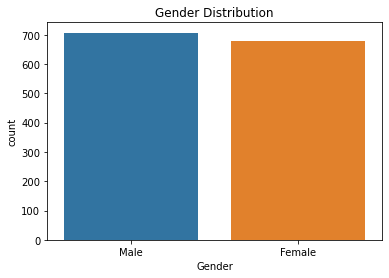

In [20]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

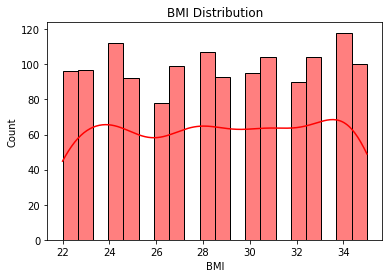

In [21]:

sns.histplot(df.BMI, bins=20, kde=True, color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

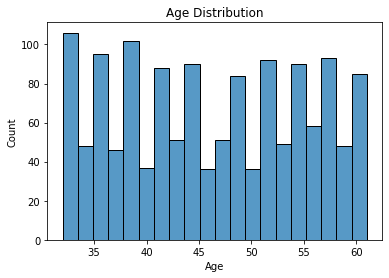

In [22]:
sns.histplot(df.Age, bins=20, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

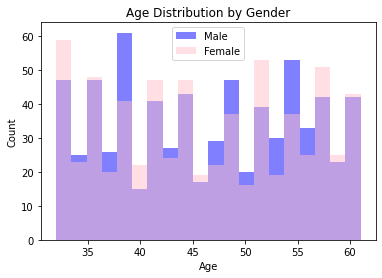

In [23]:
# Create separate dataframes for each gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Plot histograms for each gender using plt.hist()
plt.hist(male_data['Age'], bins=20, color='blue', alpha=0.5, label='Male')
plt.hist(female_data['Age'], bins=20, color='pink', alpha=0.5, label='Female')

# Set labels and title
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

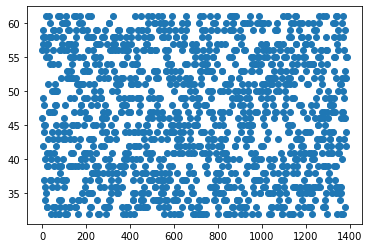

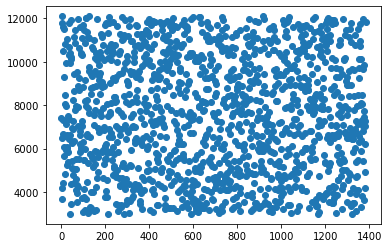

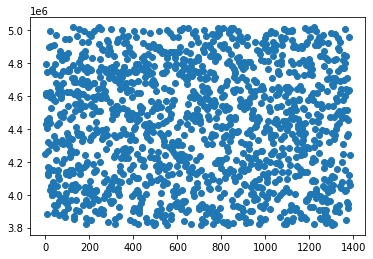

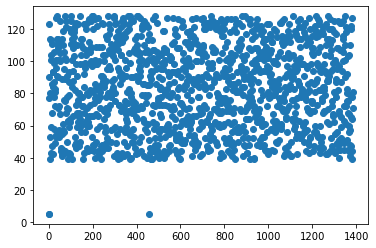

In [24]:
def scatterplt(columns):
    for col in columns:
        plt.scatter(df.index, df[col])
        plt.show()

column_names = ['Age', 'WBC', 'RBC', 'ALT 48']
scatterplt(column_names)

<AxesSubplot:xlabel='Age', ylabel='Density'>

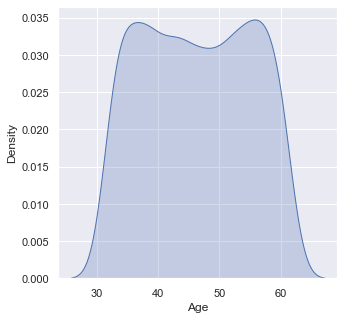

In [25]:
sns.set(rc={'figure.figsize': (5,5) })
sns.kdeplot(df ['Age'], shade=True)

Text(0.5, 1.0, 'Multiple Box Plots')

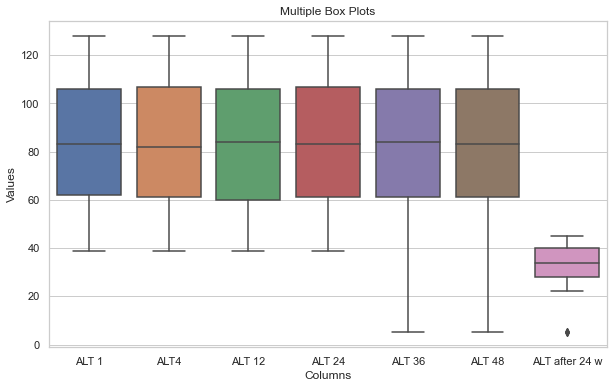

In [26]:
# Select the columns you want to plot
columns_to_plot = ['ALT 1','ALT4','ALT 12','ALT 24','ALT 36', 'ALT 48', 'ALT after 24 w']
# Create a new DataFrame with selected columns
boxplot_dt = df[columns_to_plot]

# Create box plots for the selected columns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data = boxplot_dt)
# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Multiple Box Plots')


Text(0.5, 1.0, 'Multiple Box Plots')

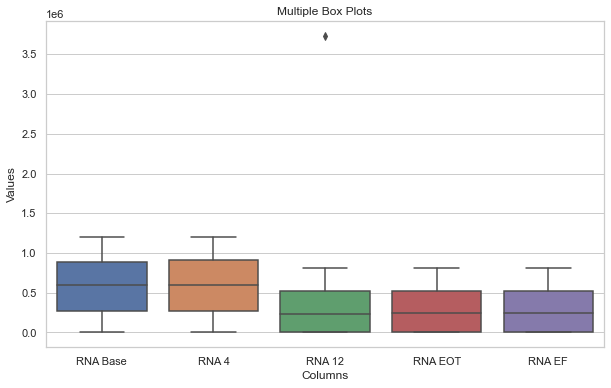

In [27]:
# Select the columns you want to plot
RNA_columns_to_plot = ['RNA Base','RNA 4','RNA 12', 'RNA EOT', 'RNA EF']

# Create a new DataFrame with selected columns
boxplot_dt = df[RNA_columns_to_plot]

# Create box plots for the selected columns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data = boxplot_dt)
# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Multiple Box Plots')

In [28]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baseline histological staging
0,56,35,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,29,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,33,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,33,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,32,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'WBC'}>,
        <AxesSubplot:title={'center':'RBC'}>,
        <AxesSubplot:title={'center':'HGB'}>],
       [<AxesSubplot:title={'center':'Plat'}>,
        <AxesSubplot:title={'center':'AST 1'}>,
        <AxesSubplot:title={'center':'ALT 1'}>,
        <AxesSubplot:title={'center':'ALT4'}>,
        <AxesSubplot:title={'center':'ALT 12'}>],
       [<AxesSubplot:title={'center':'ALT 24'}>,
        <AxesSubplot:title={'center':'ALT 36'}>,
        <AxesSubplot:title={'center':'ALT 48'}>,
        <AxesSubplot:title={'center':'ALT after 24 w'}>,
        <AxesSubplot:title={'center':'RNA Base'}>],
       [<AxesSubplot:title={'center':'RNA 4'}>,
        <AxesSubplot:title={'center':'RNA 12'}>,
        <AxesSubplot:title={'center':'RNA EOT'}>,
        <AxesSubplot:title={'center':'RNA EF'}>,
        <AxesSubplot:title={'center':'Baseline histological Grading'}>],
    

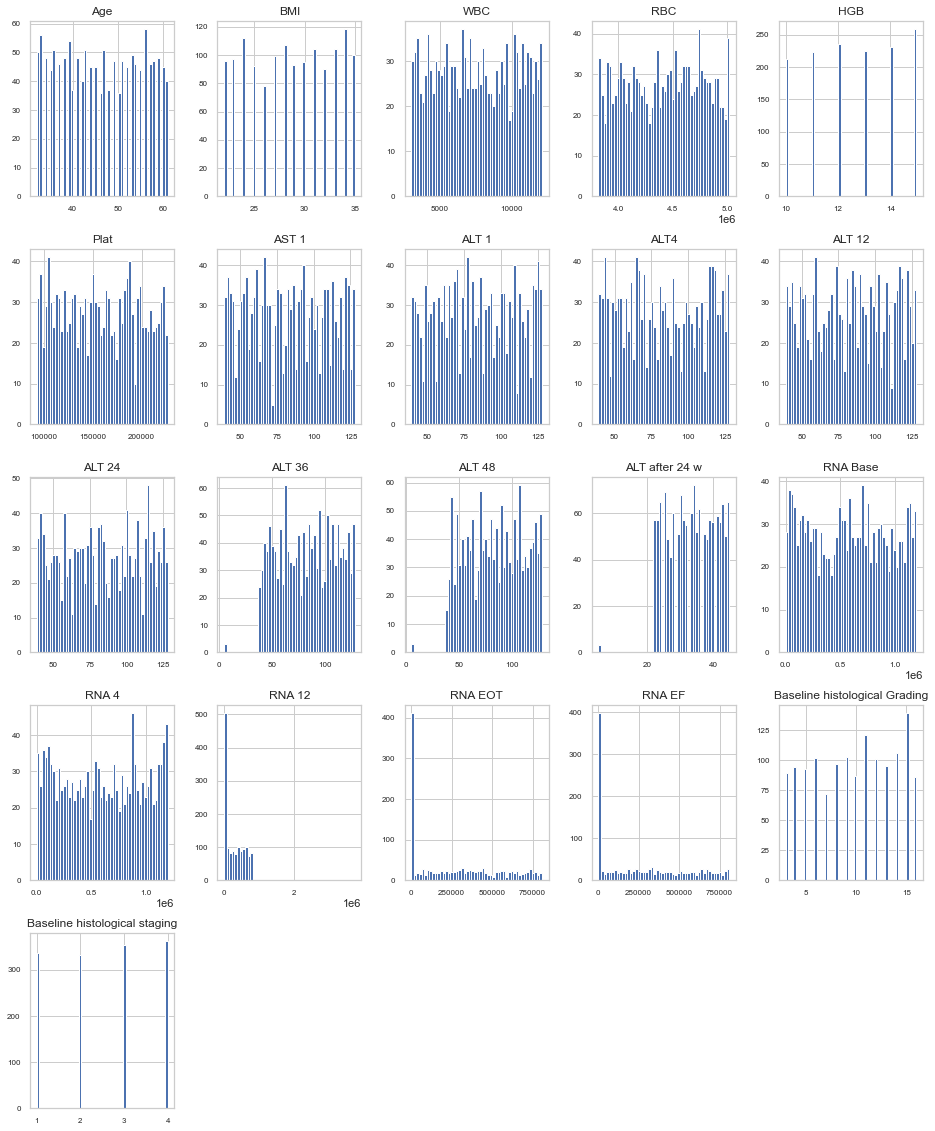

In [29]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

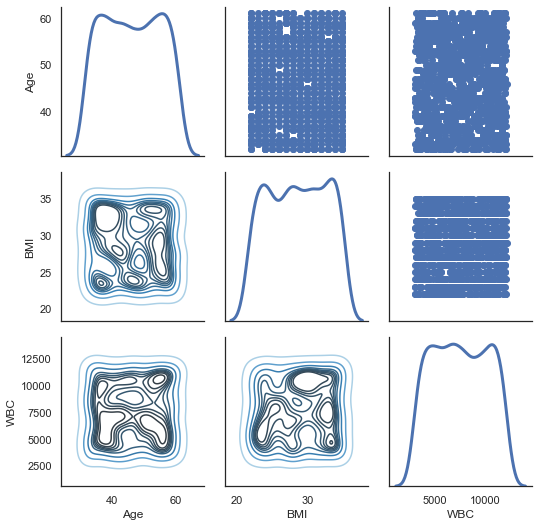

In [30]:
sns.set(style="white")
df_pair = df_num.loc[:,['Age','BMI','WBC']]
g = sns.PairGrid(df_pair, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

<AxesSubplot:xlabel='Gender and Baseline histological staging', ylabel='Count'>

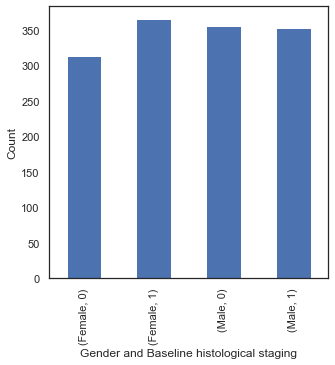

In [31]:
# Assuming you have a DataFrame named 'data' containing the relevant columns

# Grouping the data by 'Gender' and 'Baseline histological staging'
grouped_data = df2.groupby(['Gender', 'Baseline histological staging'])

# Calculate the average age for each group
average_age = grouped_data['Age'].mean()

# Count the number of individuals in each group
count = grouped_data.size()

# Print the average age and count for each group


# Create a bar plot to visualize the count of individuals in each group
count.plot(kind='bar', xlabel='Gender and Baseline histological staging', ylabel='Count')

In [32]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomiting',
       'Headache', 'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baseline histological staging'],
      dtype='object')

In [33]:
df.groupby('Baseline histological staging').mean()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
Baseline histological staging,,,,,,,,,,,,,,,,,,,,
1,46.086310,28.601190,7497.288690,4.419634e+06,12.627976,157848.494048,83.127976,82.425595,83.416667,83.857143,84.446429,83.892857,83.270833,33.330357,590487.666667,607605.967262,279316.502976,297781.160714,292849.470238,9.982143
2,47.006024,29.210843,7523.213855,4.427173e+06,12.548193,160523.367470,83.183735,84.183735,83.834337,82.909639,83.225904,82.180723,84.638554,32.996988,565042.897590,618536.403614,280593.834337,283090.265060,259014.210843,9.882530
3,46.447887,28.523944,7445.580282,4.405213e+06,12.526761,158629.197183,83.861972,83.470423,84.312676,83.557746,83.078873,83.411268,84.312676,33.521127,595218.453521,601032.281690,287836.766197,287695.571831,312017.923944,9.738028
4,45.779006,28.146409,7662.328729,4.436410e+06,12.646409,156541.013812,81.005525,85.491713,82.113260,83.693370,84.085635,82.969613,82.367403,33.861878,610957.980663,578354.486188,305895.588398,282423.204420,299454.226519,9.469613


In [34]:
df2.groupby('Baseline histological staging').mean()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
Baseline histological staging,,,,,,,,,,,,,,,,,,,,
0,46.543413,28.904192,7510.173653,4.423380e+06,12.588323,159177.922156,83.155689,83.299401,83.624251,83.386228,83.839820,83.041916,83.950599,33.164671,577841.464072,613038.459581,279951.344311,290479.697605,276033.143713,9.932635
1,46.110181,28.333333,7555.012552,4.420964e+06,12.587169,157574.912134,82.419805,84.490934,83.202232,83.626220,83.587169,83.188285,83.330544,33.693166,603165.048815,589582.683403,296954.330544,285033.651325,305674.746165,9.602510


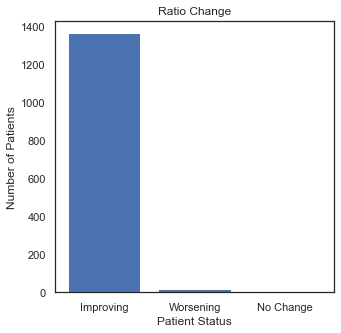

{'Number of patients improving': 1363, 'Number of patients worsening': 17, 'Number of patients with no change': 5}


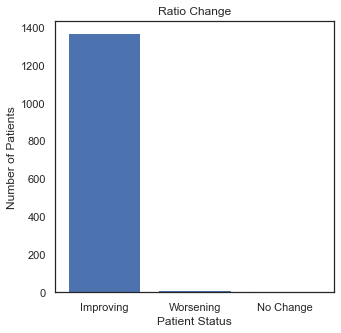

{'Number of patients improving': 1366, 'Number of patients worsening': 12, 'Number of patients with no change': 7}


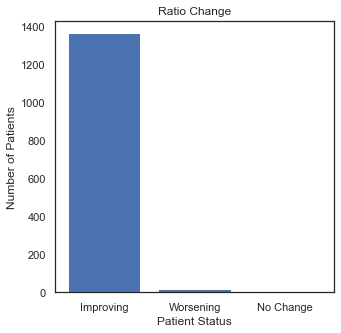

{'Number of patients improving': 1362, 'Number of patients worsening': 17, 'Number of patients with no change': 6}


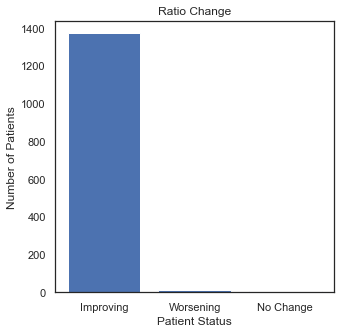

{'Number of patients improving': 1370, 'Number of patients worsening': 10, 'Number of patients with no change': 5}


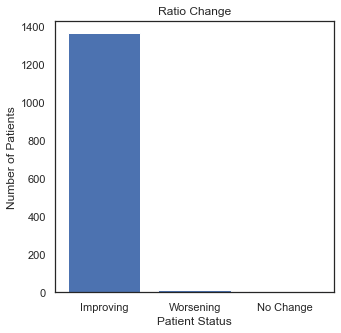

{'Number of patients improving': 1364, 'Number of patients worsening': 13, 'Number of patients with no change': 8}


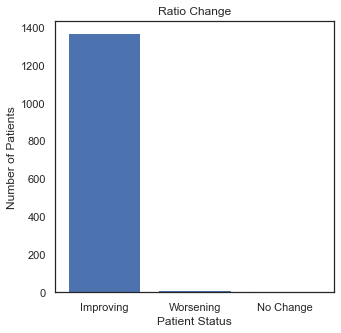

{'Number of patients improving': 1366, 'Number of patients worsening': 10, 'Number of patients with no change': 9}


In [35]:
def calculate_patient_improvement(df, alt_column1, alt_column2):
    """
    Calculate the improvement or worsening of patients based on the difference between two ALT columns.

    Args:
        df (pd.DataFrame): Input DataFrame containing patient data.
        alt_column1 (str): Name of the first ALT column.
        alt_column2 (str): Name of the second ALT column.

    Returns:
        dict: A dictionary containing the counts of patients showing improvement, worsening, or no change.

    """
    diff_data = df.groupby('Patient ID').apply(lambda x: x[alt_column2].values[0] - x[alt_column1].values[0])

    # Calculate the percentage change for visualization
    diff_data_percentage = diff_data / df[alt_column1] * 100
    # Determine the improvement or worsening for each patient
    improvement_mask = diff_data < 0
    worsening_mask = diff_data > 0

    # Count the number of patients showing improvement, worsening, or no change
    num_improving = improvement_mask.sum()
    num_worsening = worsening_mask.sum()
    num_no_change = (~improvement_mask & ~worsening_mask).sum()

    # Return the summary as a dictionary
    summary = {
        'Number of patients improving': num_improving,
        'Number of patients worsening': num_worsening,
        'Number of patients with no change': num_no_change
        
    }
    
    # Create a bar plot to visualize the improvement/worsening
    labels = ['Improving', 'Worsening', 'No Change']
    counts = [num_improving, num_worsening, num_no_change]

    plt.bar(labels, counts)
    plt.xlabel('Patient Status')
    plt.ylabel('Number of Patients')
    plt.title('Ratio Change')
    plt.show()

    return summary



summary1 = calculate_patient_improvement(df, 'ALT 1', 'ALT after 24 w')
print(summary1)

summary2 = calculate_patient_improvement(df, 'ALT4', 'ALT after 24 w')
print(summary2)

summary3 = calculate_patient_improvement(df, 'ALT 12', 'ALT after 24 w')
print(summary3)

summary4 = calculate_patient_improvement(df, 'ALT 24', 'ALT after 24 w')
print(summary4)

summary5 = calculate_patient_improvement(df, 'ALT 36', 'ALT after 24 w')
print(summary5)

summary6 = calculate_patient_improvement(df, 'ALT 48', 'ALT after 24 w')
print(summary6)


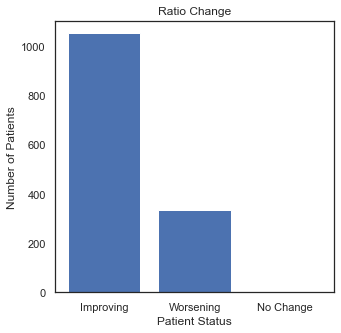

{'Number of patients improving': 1051, 'Number of patients worsening': 334, 'Number of patients with no change': 0}


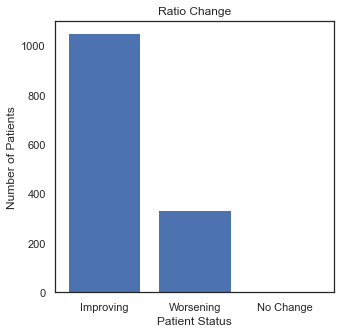

{'Number of patients improving': 1049, 'Number of patients worsening': 335, 'Number of patients with no change': 1}


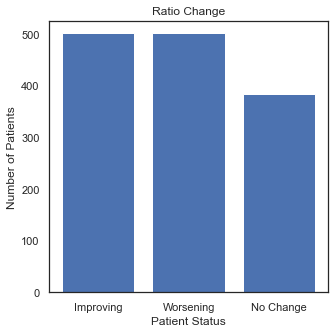

{'Number of patients improving': 501, 'Number of patients worsening': 501, 'Number of patients with no change': 383}


In [36]:
RNA_summary = calculate_patient_improvement(df, 'RNA Base', 'RNA EOT')
print(RNA_summary)

RNA2_summary = calculate_patient_improvement(df, 'RNA 4', 'RNA EOT')
print(RNA2_summary)

RNA3_summary = calculate_patient_improvement(df, 'RNA 12', 'RNA EOT')
print(RNA3_summary)

### FEATURES SELECTION

<AxesSubplot:>

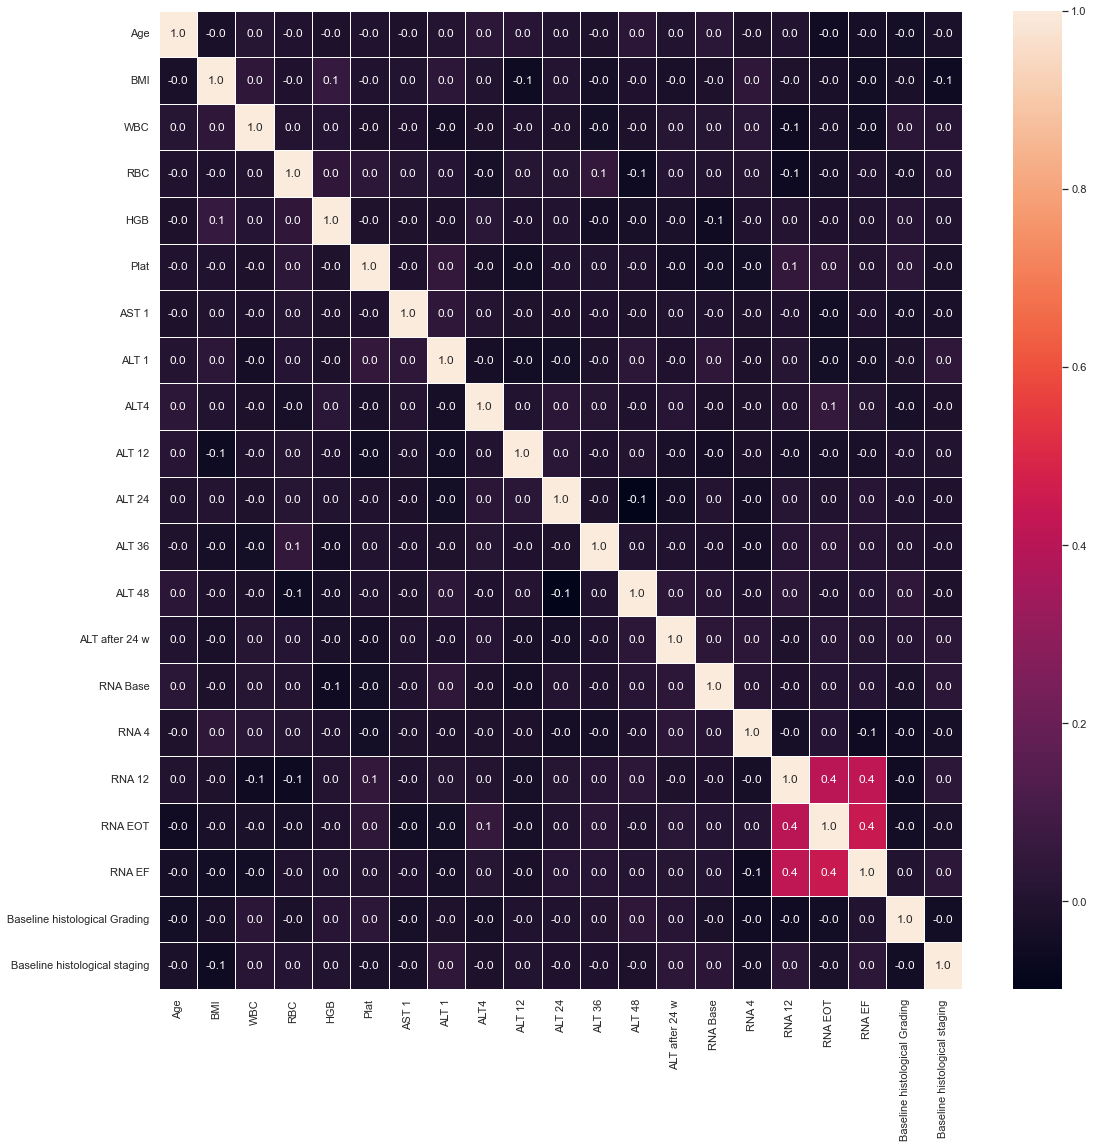

In [37]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Pearson Coefficient 

This is used to find the correlation  of each column with the target column

Finally, From this, Features selection will be perfomed for better accuracy

In [38]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Fever'] = df['Fever'].map({'Absent': 0, 'Present': 1})
df["Nausea/Vomiting"] = df["Nausea/Vomiting"].map({'Absent': 0, 'Present':1})
df['Headache'] = df['Headache'].map({'Absent': 0, 'Present' : 1})
df['Diarrhea'] = df['Diarrhea'].map({'Absent': 0,'Present': 1})
df['Fatigue & generalized bone ache'] = df['Fatigue & generalized bone ache'].map({'Absent': 0, 'Present': 1})
df['Jaundice'] = df['Jaundice'].map({'Absent': 0, 'Present': 1})
df['Epigastric pain'] = df['Epigastric pain'].map({'Absent': 0, 'Present': 1})

In [39]:
del df['Patient ID']

from scipy.stats import pearsonr
for i in range(28):
    x = df.iloc[:,i]
    corr = df.iloc[:,28]
    corr, p_value = pearsonr(x, corr)
    print(i, corr)

0 -0.019599168581734612
1 0.011955338158832497
2 -0.05725885713797821
3 -0.03097517616405611
4 0.054906373691484274
5 -0.001996057890639301
6 -0.00563926927245342
7 0.014562612305633167
8 0.020218564622843077
9 -0.05210957468088373
10 0.01794500381303977
11 0.009622816886339512
12 0.002752465488484559
13 -0.017283639205600183
14 -0.025125961755228604
15 0.03686657735468361
16 -0.014997008378578255
17 0.00080888699260991
18 -0.004888039313686601
19 -0.0064299196655784995
20 -0.013533125126737334
21 0.033918723245544055
22 0.029410557652334995
23 -0.0329458485719925
24 0.03444872963243062
25 -0.01748612533162972
26 0.030518759491111366
27 -0.047071590458694065


In [40]:
temp = df.columns.values

In [41]:
temp1 = [1, 4, 7, 8, 10, 11, 12, 15, 21, 22, 24, 26, 27, 28]

for i in temp1:
    print(temp[i])

Gender
Nausea/Vomiting
Fatigue & generalized bone ache
Jaundice
WBC
RBC
HGB
ALT 1
ALT after 24 w
RNA Base
RNA 12
RNA EF
Baseline histological Grading
Baseline histological staging


In [42]:
col = ['Gender', 'Nausea/Vomiting', 'Fatigue & generalized bone ache', 'Jaundice',
'WBC', 'RBC', 'HGB', 'ALT 1', 'ALT after 24 w','RNA Base', 'RNA 12', 'RNA EF', 'Baseline histological Grading',
'Baseline histological staging']


In [43]:
df = df[col]
df

,Gender,Nausea/Vomiting,Fatigue & generalized bone ache,Jaundice,WBC,RBC,HGB,ALT 1,ALT after 24 w,RNA Base,RNA 12,RNA EF,Baseline histological Grading,Baseline histological staging
0,0,0,1,1,7425,4248807.0,14,84,5,655330,288194,5,13,2
1,0,1,1,1,12101,4429425.0,10,123,44,40620,637056,31085,4,2
2,0,1,0,0,4178,4621191.0,12,49,5,571148,5,558829,4,4
3,1,1,0,1,6490,4794631.0,10,64,33,1041941,585688,582301,10,3
4,0,0,1,1,3661,4606375.0,11,104,30,660410,3731527,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,0,1,0,0,7044,4957174.0,15,59,45,387795,5,5,15,4
1381,0,1,0,0,6207,4636951.0,10,102,41,481378,393339,236273,10,2
1382,0,1,0,1,4913,4122038.0,14,93,24,612664,806109,160457,6,2
1383,0,0,1,1,7257,4241990.0,10,97,43,139872,515730,696074,15,3


### DATA PRE-PROCESSING

In [44]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
LE=LabelEncoder()

for i in df:
    df[i] = LE.fit_transform(df[i].astype(str).values)
    

In [45]:
# FOR TARGET

# Example data with original class labels
original_labels = [1, 2, 3, 4]


# Fit the label encoder and transform the original labels
encoded_labels = LE.fit_transform(original_labels)


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the StandardScaler
scaler = MinMaxScaler()

X = df.drop('Baseline histological staging', axis=1)
# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)


In [47]:
y = df['Baseline histological staging']

In [48]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### n_estimators = 100

In [50]:
random_clf = RandomForestClassifier(n_estimators=100)

In [51]:
random_clf = random_clf.fit(X_train, y_train)

In [52]:
y_pred = random_clf.predict(X_test)

In [53]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2692307692307692


In [54]:
cm = confusion_matrix(y_test, y_pred)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,3,All
Actual,,,,,
0,18,18,29,33,98
1,18,29,30,25,102
2,21,15,35,33,104
3,22,26,34,30,112
All,79,88,128,121,416


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.18      0.20        98
           1       0.33      0.28      0.31       102
           2       0.27      0.34      0.30       104
           3       0.25      0.27      0.26       112

    accuracy                           0.27       416
   macro avg       0.27      0.27      0.27       416
weighted avg       0.27      0.27      0.27       416



## Decision Tree

In [56]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)


In [57]:
y_pred = dtree.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25961538461538464


In [58]:
cm = confusion_matrix(y_test, y_pred)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,3,All
Actual,,,,,
0,21,20,26,31,98
1,21,30,26,25,102
2,24,32,23,25,104
3,22,27,29,34,112
All,88,109,104,115,416


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.21      0.23        98
           1       0.28      0.29      0.28       102
           2       0.22      0.22      0.22       104
           3       0.30      0.30      0.30       112

    accuracy                           0.26       416
   macro avg       0.26      0.26      0.26       416
weighted avg       0.26      0.26      0.26       416



### Binary Classifier

In [60]:
y = df2['Baseline histological staging']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [62]:
random_clf = RandomForestClassifier(n_estimators=100)
random_clf = random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5120192307692307


In [63]:
cm = confusion_matrix(y_test, y_pred)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,85,126,211
1,77,128,205
All,162,254,416


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.40      0.46       211
           1       0.50      0.62      0.56       205

    accuracy                           0.51       416
   macro avg       0.51      0.51      0.51       416
weighted avg       0.51      0.51      0.51       416



## Decision Tree

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)


In [66]:
y_pred = dtree.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46634615384615385


In [67]:
cm = confusion_matrix(y_test, y_pred)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,104,107,211
1,115,90,205
All,219,197,416


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48       211
           1       0.46      0.44      0.45       205

    accuracy                           0.47       416
   macro avg       0.47      0.47      0.47       416
weighted avg       0.47      0.47      0.47       416

